In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# Load the dataset
data = pd.read_csv("car data.csv")

# Data Preprocessing
# Handle missing values
data.fillna(0, inplace=True)
# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Feature Engineering (Example: Calculate car age)
current_year = 2023
data['Car_Age'] = current_year - data['Year']

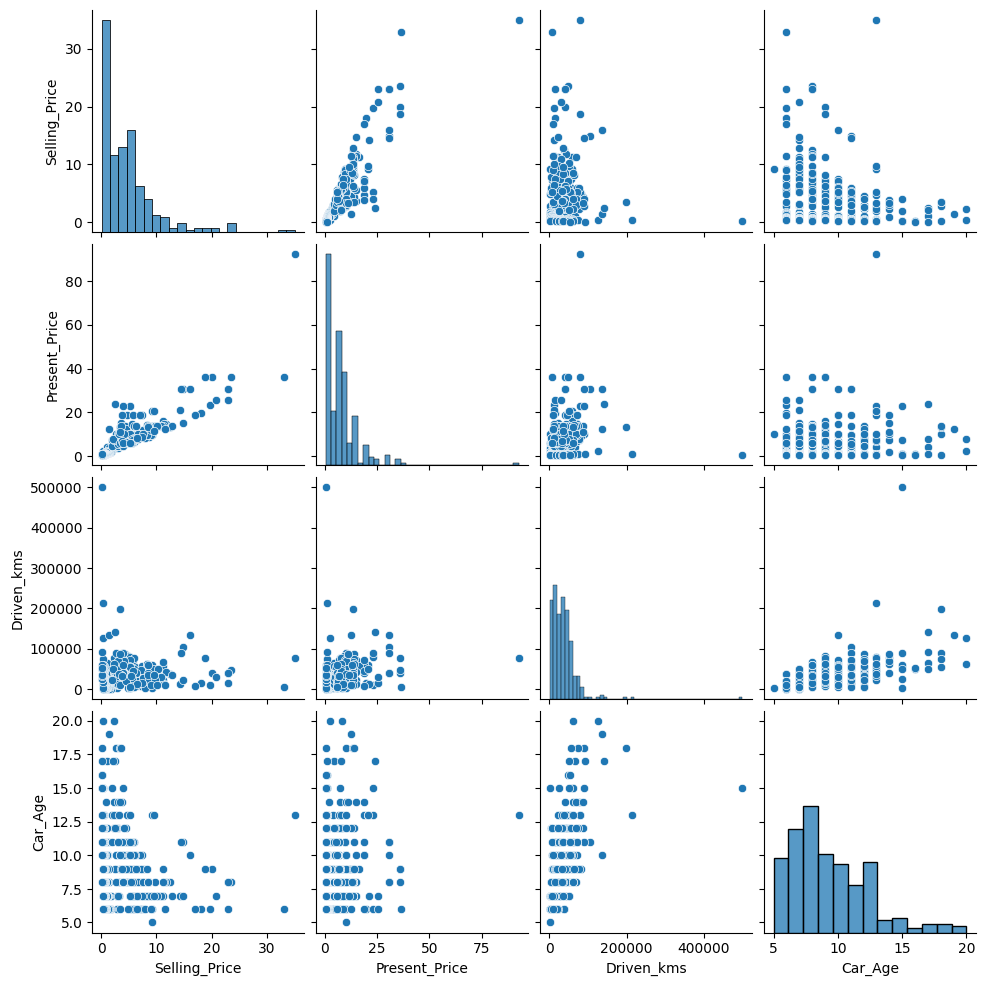

In [4]:
# Pairplot for numerical features
sns.pairplot(data[['Selling_Price', 'Present_Price', 'Driven_kms', 'Car_Age']])
plt.show()

<ipython-input-5-996cc208ca73>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


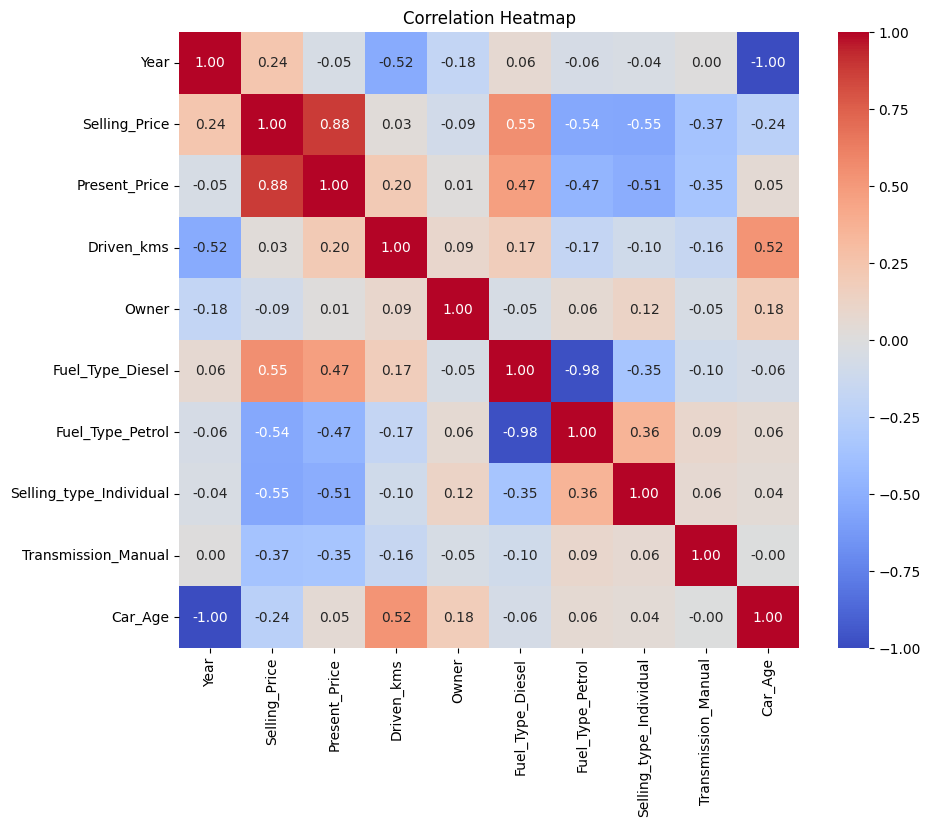

In [5]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Select features and target variable
X = data.drop(['Car_Name', 'Year', 'Selling_Price'], axis=1)
y = data['Selling_Price']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Model Selection and Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:

# Model Evaluation
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE is the square root of MSE
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')



Mean Absolute Error: 0.636781967213115
Mean Squared Error: 0.9246533109836059
Root Mean Squared Error: 0.9615889511551211


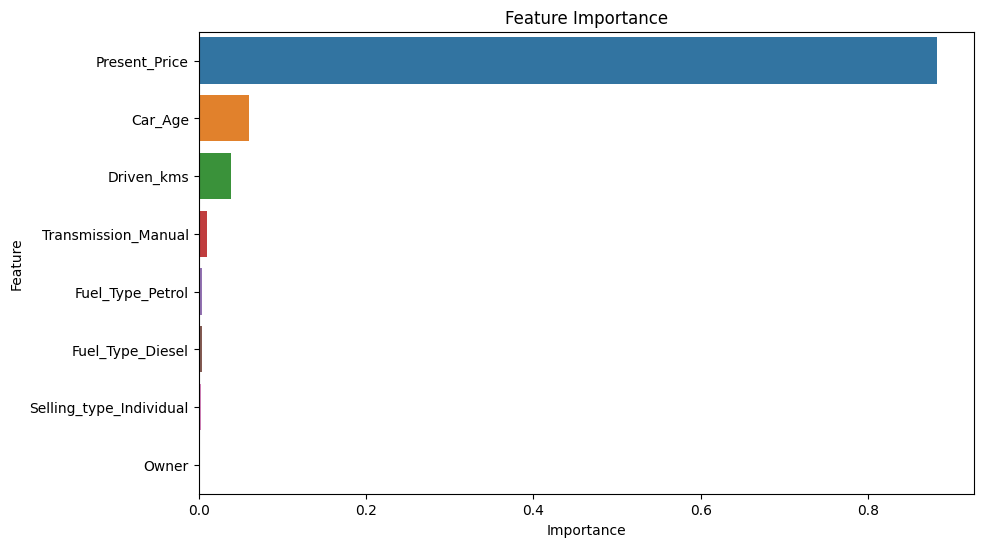


Detailed Results:
Top 5 Feature Importance:
               Feature  Importance
0        Present_Price    0.881833
7              Car_Age    0.060451
1           Driven_kms    0.038501
6  Transmission_Manual    0.009601
4     Fuel_Type_Petrol    0.003505

Sample Predictions vs Actual:
     Actual  Predicted
177    0.35     0.4468
289   10.11    10.8902
228    4.95     4.9365
198    0.15     0.2161
60     6.95     7.7558


In [12]:
# Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Predictions
# You can use the trained model to make predictions for new data
# For example, if you have a new car data point in the variable "new_car_data", you can predict its selling price as follows:
# new_car_price = model.predict(new_car_data)

# Print detailed results
print("\nDetailed Results:")
print("Top 5 Feature Importance:")
print(feature_importance_df.head())
print("\nSample Predictions vs Actual:")
sample_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(sample_results.head())
